In [1]:
from keras.models import Sequential 
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


In [2]:
class MiniVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        # stack layers
        # first CONV => RELU => CONV => RELU => POOL layer set
        model.add(Conv2D(32, (3, 3), padding="same",
        input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # second CONV => RELU => CONV => RELU => POOL layer set
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        # return the constructed network architecture
        return model


In [3]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

In [4]:
#normalize input to range[0 : 1]
trainX =  trainX.astype("float")/255
testX = testX.astype("float")/255
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
#initialize label names for dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#init hyperparamerters
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy" , optimizer=opt,
metrics=["accuracy"])
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
batch_size=256, epochs=250,verbose=1)

[INFO] compiling model...
[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/250
50000/50000 [==============================] - 11s 224us/step - loss: 1.6869 - acc: 0.4386 - val_loss: 1.2860 - val_acc: 0.5433
Epoch 2/250
50000/50000 [==============================] - 9s 172us/step - loss: 1.1873 - acc: 0.5758 - val_loss: 1.0725 - val_acc: 0.6167
Epoch 3/250
50000/50000 [==============================] - 9s 176us/step - loss: 1.0283 - acc: 0.6344 - val_loss: 0.9492 - val_acc: 0.6642
Epoch 4/250
50000/50000 [==============================] - 9s 178us/step - loss: 0.9340 - acc: 0.6675 - val_loss: 1.0163 - val_acc: 0.6516
Epoch 5/250
50000/50000 [==============================] - 9s 173us/step - loss: 0.8593 - acc: 0.6967 - val_loss: 0.8288 - val_acc: 0.7095
Epoch 6/250
50000/50000 [==============================] - 9s 173us/step - loss: 0.8066 - acc: 0.7153 - val_loss: 0.7701 - val_acc: 0.7346
Epoch 7/250
50000/50000 [==============================] - 9s 

Epoch 59/250
50000/50000 [==============================] - 9s 178us/step - loss: 0.2197 - acc: 0.9208 - val_loss: 0.5703 - val_acc: 0.8247
Epoch 60/250
50000/50000 [==============================] - 9s 176us/step - loss: 0.2144 - acc: 0.9224 - val_loss: 0.6142 - val_acc: 0.8237
Epoch 61/250
50000/50000 [==============================] - 9s 175us/step - loss: 0.2126 - acc: 0.9237 - val_loss: 0.5789 - val_acc: 0.8254
Epoch 62/250
50000/50000 [==============================] - 9s 176us/step - loss: 0.2100 - acc: 0.9245 - val_loss: 0.6108 - val_acc: 0.8183
Epoch 63/250
50000/50000 [==============================] - 9s 179us/step - loss: 0.2080 - acc: 0.9262 - val_loss: 0.5742 - val_acc: 0.8274
Epoch 64/250
50000/50000 [==============================] - 9s 176us/step - loss: 0.2082 - acc: 0.9253 - val_loss: 0.5908 - val_acc: 0.8269
Epoch 65/250
50000/50000 [==============================] - 9s 180us/step - loss: 0.2053 - acc: 0.9271 - val_loss: 0.6862 - val_acc: 0.8059
Epoch 66/250
50000/5

50000/50000 [==============================] - 9s 171us/step - loss: 0.1267 - acc: 0.9548 - val_loss: 0.6150 - val_acc: 0.8328
Epoch 118/250
50000/50000 [==============================] - 9s 172us/step - loss: 0.1236 - acc: 0.9555 - val_loss: 0.6669 - val_acc: 0.8254
Epoch 119/250
50000/50000 [==============================] - 9s 172us/step - loss: 0.1219 - acc: 0.9568 - val_loss: 0.6334 - val_acc: 0.8297
Epoch 120/250
50000/50000 [==============================] - 9s 172us/step - loss: 0.1198 - acc: 0.9573 - val_loss: 0.6493 - val_acc: 0.8294
Epoch 121/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.1231 - acc: 0.9567 - val_loss: 0.6443 - val_acc: 0.8275
Epoch 122/250
50000/50000 [==============================] - 9s 172us/step - loss: 0.1250 - acc: 0.9555 - val_loss: 0.6208 - val_acc: 0.8305
Epoch 123/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.1224 - acc: 0.9559 - val_loss: 0.6299 - val_acc: 0.8291
Epoch 124/250
50000/50000 [

50000/50000 [==============================] - 9s 171us/step - loss: 0.0963 - acc: 0.9663 - val_loss: 0.6386 - val_acc: 0.8342
Epoch 176/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0943 - acc: 0.9664 - val_loss: 0.6378 - val_acc: 0.8323
Epoch 177/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0957 - acc: 0.9664 - val_loss: 0.6399 - val_acc: 0.8328
Epoch 178/250
50000/50000 [==============================] - 9s 170us/step - loss: 0.0923 - acc: 0.9672 - val_loss: 0.6357 - val_acc: 0.8341
Epoch 179/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0910 - acc: 0.9678 - val_loss: 0.6681 - val_acc: 0.8282
Epoch 180/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0919 - acc: 0.9679 - val_loss: 0.6548 - val_acc: 0.8294
Epoch 181/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0951 - acc: 0.9660 - val_loss: 0.6333 - val_acc: 0.8337
Epoch 182/250
50000/50000 [

50000/50000 [==============================] - 9s 172us/step - loss: 0.0804 - acc: 0.9720 - val_loss: 0.6768 - val_acc: 0.8313
Epoch 234/250
50000/50000 [==============================] - 9s 176us/step - loss: 0.0780 - acc: 0.9727 - val_loss: 0.6562 - val_acc: 0.8362
Epoch 235/250
50000/50000 [==============================] - 9s 172us/step - loss: 0.0756 - acc: 0.9736 - val_loss: 0.6586 - val_acc: 0.8357
Epoch 236/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0771 - acc: 0.9725 - val_loss: 0.6493 - val_acc: 0.8357
Epoch 237/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0769 - acc: 0.9721 - val_loss: 0.6616 - val_acc: 0.8340
Epoch 238/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0774 - acc: 0.9727 - val_loss: 0.6719 - val_acc: 0.8348
Epoch 239/250
50000/50000 [==============================] - 9s 171us/step - loss: 0.0777 - acc: 0.9728 - val_loss: 0.6547 - val_acc: 0.8328
Epoch 240/250
50000/50000 [

In [5]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.86      0.84      0.85      1000
  automobile       0.92      0.91      0.92      1000
        bird       0.79      0.74      0.77      1000
         cat       0.71      0.66      0.69      1000
        deer       0.80      0.82      0.81      1000
         dog       0.78      0.76      0.77      1000
        frog       0.83      0.91      0.87      1000
       horse       0.89      0.88      0.88      1000
        ship       0.89      0.92      0.90      1000
       truck       0.88      0.91      0.90      1000

   micro avg       0.84      0.84      0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



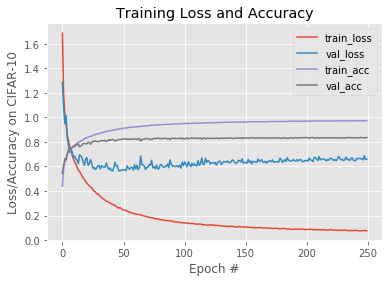

In [6]:
import matplotlib.pyplot as plt
epochs = 250
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy on CIFAR-10")
plt.legend()
plt.show()